In [2]:
# Watch for any changes in vocabulary.py, data_loader.py, utils.py or model.py, and re-load it automatically.
%load_ext autoreload
%autoreload 2

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import PIL

import torch
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [5]:
from data.dataloader import *

In [4]:
batch_size=1
input_size=112
shuffle=True
mode='train'
num_workers=4
data_root = '/data6/plankton_test_db_new/data/1/'
# data_root = '/data6/lekevin/hab-spc/phytoplankton-db/csv/proro'

In [6]:
dataset = SPCHABDataset(data_root, mode=mode, input_size=input_size)

All classes detected are: {0: 'Akashiwo', 1: 'Ceratium falcatiforme or fusus', 2: 'Ceratium furca', 3: 'Ceratium other', 4: 'Chaetoceros socialis', 5: 'Chattonella', 6: 'Ciliates', 7: 'Cochlodinium', 8: 'Curved diatom chain', 9: 'Dinophysis', 10: 'Eucampia', 11: 'Gyrodinium', 12: 'Lingulodinium polyedra', 13: 'Nauplii', 14: 'Polykrikos', 15: 'Prorocentrum michans', 16: 'Prorocentrum spp', 17: 'Pseudo-nitzschia chain', 18: 'Sand', 19: 'Straight diatom chains', 20: 'Thalassionema or Thalassiothrix chain', 21: 'Unknown naked dinoflagellates', 22: 'detritus', 23: 'other'}
opt.class_num = 24


Ceratium other


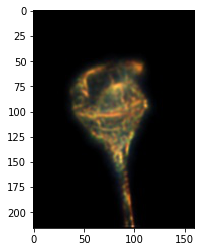

Polykrikos


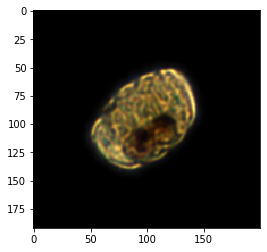

Ceratium falcatiforme or fusus


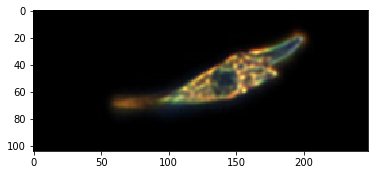

Eucampia


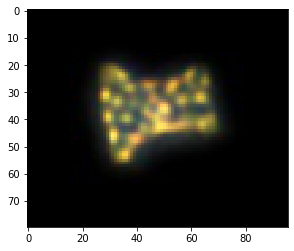

Thalassionema or Thalassiothrix chain


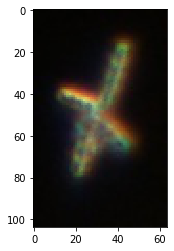

Prorocentrum michans


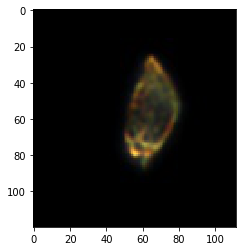

Sand


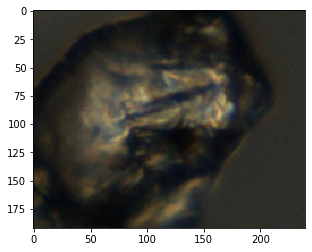

Nauplii


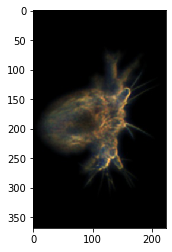

Cochlodinium


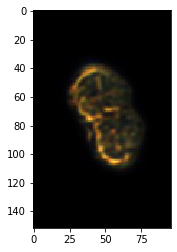

Sand


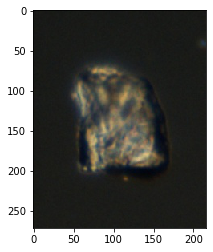

In [21]:
for index in range(10):
    img_link = dataset.data.iloc[index]["images"]
    print(dataset.data.iloc[index]['label'])
    img = pil_loader(img_link)
    plt.imshow(img)
    plt.show()

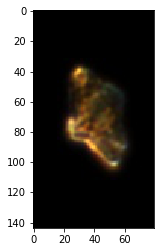

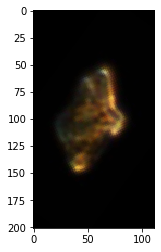

In [18]:
index = 10
img_link = dataset.data.iloc[index]["images"]
print(dataset.data.iloc[index]['label'])
img = pil_loader(img_link)
plt.imshow(img)
plt.show()

rescale_size = 112
input_size = 112
data_transform = {
            TRAIN: transforms.Compose([transforms.Resize(rescale_size),
                                       #transforms.RandomCrop(input_size),
                                       transforms.ColorJitter(brightness=0, contrast=0.5, saturation=0, hue=0),
                                      transforms.RandomAffine(360, translate=None, scale=None, shear=None, resample=PIL.Image.NEAREST, fillcolor=0),
                                        
                                      ]),
            VAL:  transforms.Compose([transforms.Resize(rescale_size),
                                       transforms.CenterCrop(input_size)]),
            DEPLOY: transforms.Compose([transforms.Resize(rescale_size),
                                       transforms.CenterCrop(input_size)])
}

img = data_transform[TRAIN](img)
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


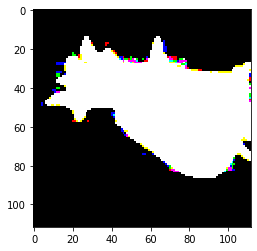

In [16]:
img = pil2numpy(img)
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


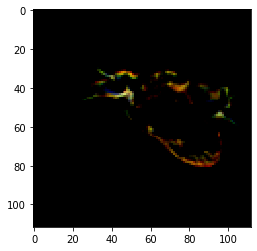

In [17]:
img = rgb_preproc(img)
plt.imshow(img)